In [1]:
import pandas as pd
import numpy as np

data1 = pd.read_excel('matrix_all_genes.xlsx')
data = pd.read_excel('seurat_labels.xlsx')
data2 = pd.read_excel("markers_features.xlsx")
# data = data.set_index(' ')
data = data.rename(columns={' ': 'Row.names'})

In [2]:
data["Class"] = 0

In [3]:
data

,Row.names,integrated@active.ident,Class
0,sham_sham1_3,Cardiomyocytes,0
1,sham_sham1_4,Cardiomyocytes,0
2,sham_sham1_9,Cardiomyocytes,0
3,sham_sham1_18,Cardiomyocytes,0
4,sham_sham1_19,Cardiomyocytes,0
...,...,...,...
1730,mi_mi5_379,Fibroblasts,0
1731,mi_mi5_380,Immune,0
1732,mi_mi5_381,Fibroblasts,0
1733,mi_mi5_383,Fibroblasts,0


In [4]:
for index, row in data.iterrows():
    #print(row['integrated@active.ident'])
    if row['integrated@active.ident'] == "Cardiomyocytes":
        data['Class'].iloc[index]=0
    elif row['integrated@active.ident'] == "Fibroblasts":
        data['Class'].iloc[index]=1
    elif row['integrated@active.ident'] == "Endothelial":
        data['Class'].iloc[index]=2
    else:
        data['Class'].iloc[index]=3

/home/ubuntu/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [5]:
data.groupby('Class').count()

,Row.names,integrated@active.ident
Class,,
0,760,760
1,834,834
2,88,88
3,53,53


In [6]:
data

,Row.names,integrated@active.ident,Class
0,sham_sham1_3,Cardiomyocytes,0
1,sham_sham1_4,Cardiomyocytes,0
2,sham_sham1_9,Cardiomyocytes,0
3,sham_sham1_18,Cardiomyocytes,0
4,sham_sham1_19,Cardiomyocytes,0
...,...,...,...
1730,mi_mi5_379,Fibroblasts,1
1731,mi_mi5_380,Immune,3
1732,mi_mi5_381,Fibroblasts,1
1733,mi_mi5_383,Fibroblasts,1


In [7]:
data.drop(['integrated@active.ident'], axis='columns', inplace=True)

### Matrix

In [8]:
#data1 = data1.set_index(' ')
#data2 = data2.set_index('Row.names')
data1 = data1.rename(columns={' ': 'Row.names'})
data2.drop(['p_val.x','avg_log2FC.x', 'pct.1.x',"pct.2.x",'p_val_adj.x','p_val.y','avg_log2FC.y','pct.1.y','pct.2.y','p_val_adj.y'], axis='columns', inplace=True)
#data2 = data2.drop_duplicates()

In [9]:
data2

,Row.names
0,5430435G22Rik--chr1
1,AA467197--chr2
2,AI662270--chr11
3,Aldh1a2--chr9
4,Anxa1--chr19
5,Arhgef2--chr3
6,Arl4c--chr1
7,Arrb2--chr11
8,Atf3--chr1
9,Bcat1--chr6


In [10]:
data1

,Row.names,sham_sham1_3,sham_sham1_4,sham_sham1_9,sham_sham1_18,sham_sham1_19,sham_sham1_20,sham_sham1_26,sham_sham1_27,sham_sham1_32,...,mi_mi5_370,mi_mi5_372,mi_mi5_373,mi_mi5_376,mi_mi5_378,mi_mi5_379,mi_mi5_380,mi_mi5_381,mi_mi5_383,mi_mi5_384
0,Nppa--chr4,0.682949,0.461998,-0.030087,0.685511,-0.357476,-0.216611,-0.712284,-0.097751,3.355194,...,0.000000,0.000000,3.037880,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Lrg1--chr17,1.158125,1.227301,-0.047149,-0.772731,2.233937,0.235876,-0.153068,-0.735795,2.583236,...,0.000000,0.000000,2.391556,0.0,0.000000,0.000000,3.946290,0.000000,0.000000,0.000000
2,Fabp4--chr3,-0.645581,-0.389633,-0.512315,-0.660781,0.096774,2.739436,0.087506,-0.307935,-0.005465,...,0.000000,2.834721,2.391556,0.0,3.292377,3.624244,1.531369,0.000000,0.000000,0.000000
3,C1qa--chr4,0.226843,0.207889,0.323539,0.229799,0.214139,0.336237,0.278207,0.348932,0.155536,...,0.000000,2.834721,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,Spp1--chr5,1.088496,1.693829,1.687589,1.087271,1.309020,1.695335,1.470370,1.024486,1.430577,...,3.056023,2.834721,2.391556,0.0,0.000000,0.000000,2.110092,3.597393,3.356926,3.286162
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3553,Kif1b--chr4,1.627405,-0.291695,-0.068967,0.139384,2.386236,-0.465456,-0.197010,-0.490790,-0.187186,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3554,Lamtor4--chr5,-0.164287,-0.008435,0.005992,-0.159693,-0.016171,0.148092,0.074380,-0.014017,0.088066,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.531369,0.000000,0.000000,0.000000
3555,Smad7--chr18,0.000000,0.000000,0.010786,0.000000,0.000000,1.517905,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3556,Ino80--chr2,0.000000,-0.037026,-0.029508,0.000000,0.000000,0.077410,-0.045623,0.000000,-0.028065,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [11]:
common = pd.merge(data1, data2, on='Row.names')
common = common.set_index('Row.names')

In [12]:
common

,sham_sham1_3,sham_sham1_4,sham_sham1_9,sham_sham1_18,sham_sham1_19,sham_sham1_20,sham_sham1_26,sham_sham1_27,sham_sham1_32,sham_sham1_33,...,mi_mi5_370,mi_mi5_372,mi_mi5_373,mi_mi5_376,mi_mi5_378,mi_mi5_379,mi_mi5_380,mi_mi5_381,mi_mi5_383,mi_mi5_384
Row.names,,,,,,,,,,,,,,,,,,,,,
Cav1--chr6,0.072951,0.110279,-0.121549,0.070371,0.136402,1.882070,0.178024,0.045303,0.166194,0.085500,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.934005,0.000000,2.629729
Aqp1--chr6,-0.048037,-0.098917,-0.128577,-0.045610,0.035410,0.560380,-0.028728,-0.002029,-0.027647,0.031911,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Cd52--chr4,0.443286,0.294097,0.476209,0.446967,0.505475,0.675492,0.265965,0.392826,0.311386,0.464672,...,0.000000,2.834721,2.391556,0.000000,2.635721,0.000000,2.950866,0.000000,0.000000,0.000000
Btg2--chr1,0.477464,0.301502,0.283398,0.476315,0.357268,-0.087092,0.482118,0.256862,0.449930,0.223332,...,0.000000,0.000000,3.037880,0.000000,0.000000,0.000000,3.272284,0.000000,0.000000,0.000000
Cdh5--chr8,-0.103080,-0.046591,-0.211554,-0.108657,-0.016079,2.009343,0.011747,-0.048465,0.017968,-0.017566,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Cd300lf--chr11,0.025597,0.039947,0.056007,0.024370,0.074368,0.393975,0.014531,0.085001,0.015444,0.143850,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.740711,0.000000,0.000000,0.000000
Apoe--chr7,2.117376,2.110790,2.433269,2.099227,2.836488,1.579960,2.515582,2.655216,2.659253,2.593538,...,4.627074,4.396031,3.037880,3.193127,0.000000,4.303966,1.531369,3.205533,0.000000,2.629729
Cebpb--chr2,0.304043,0.377928,0.483500,0.988700,0.366456,0.735283,0.405510,0.468474,0.443162,0.474695,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.531369,1.934005,0.000000,0.000000
Acta1--chr8,-0.087128,0.304446,0.024248,-0.087041,2.380617,-0.227850,-0.072818,-0.367294,-0.207173,-0.144921,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.286162


In [13]:
common = common.drop_duplicates()
common = common.T

In [14]:
common

Row.names,Cav1--chr6,Aqp1--chr6,Cd52--chr4,Btg2--chr1,Cdh5--chr8,Cd300lf--chr11,Apoe--chr7,Cebpb--chr2,Acta1--chr8,Cd24a--chr10,...,Aggf1--chr13,Cchcr1--chr17,Bop1--chr15,Bmp2--chr2,AI662270--chr11,Bean1--chr8,Adprhl1--chr8,AI607873--chr1,Clec4d--chr6,Appl2--chr10
sham_sham1_3,0.072951,-0.048037,0.443286,0.477464,-0.103080,0.025597,2.117376,0.304043,-0.087128,0.192954,...,-0.002341,0.180286,0.138426,0.119103,0.142376,0.022858,-0.484982,0.022611,0.206858,-0.101203
sham_sham1_4,0.110279,-0.098917,0.294097,0.301502,-0.046591,0.039947,2.110790,0.377928,0.304446,0.057892,...,0.071936,0.152264,0.031311,0.145429,0.000000,-0.096683,-0.304162,0.014915,0.293326,-0.048611
sham_sham1_9,-0.121549,-0.128577,0.476209,0.283398,-0.211554,0.056007,2.433269,0.483500,0.024248,0.032312,...,-0.014353,-0.053702,0.147995,0.000000,0.015322,0.000000,-0.253901,-0.038688,0.229712,0.037559
sham_sham1_18,0.070371,-0.045610,0.446967,0.476315,-0.108657,0.024370,2.099227,0.988700,-0.087041,0.196165,...,-0.000868,0.177265,0.141241,0.117014,0.138345,0.023143,1.617058,0.021885,0.200844,0.591464
sham_sham1_19,0.136402,0.035410,0.505475,0.357268,-0.016079,0.074368,2.836488,0.366456,2.380617,0.032535,...,0.065772,0.024765,0.017849,0.015673,0.086388,0.000000,-0.304328,0.006276,0.361567,-0.075726
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
mi_mi5_379,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.303966,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
mi_mi5_380,0.000000,0.000000,2.950866,3.272284,0.000000,2.740711,1.531369,1.531369,0.000000,2.474309,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.272284,1.531369
mi_mi5_381,1.934005,0.000000,0.000000,0.000000,0.000000,0.000000,3.205533,1.934005,0.000000,0.000000,...,0.000000,0.000000,1.934005,1.934005,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
mi_mi5_383,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [15]:
common.index.name = 'Row.names'
common.reset_index(inplace=True)

In [16]:
common

Row.names,Row.names,Cav1--chr6,Aqp1--chr6,Cd52--chr4,Btg2--chr1,Cdh5--chr8,Cd300lf--chr11,Apoe--chr7,Cebpb--chr2,Acta1--chr8,...,Aggf1--chr13,Cchcr1--chr17,Bop1--chr15,Bmp2--chr2,AI662270--chr11,Bean1--chr8,Adprhl1--chr8,AI607873--chr1,Clec4d--chr6,Appl2--chr10
0,sham_sham1_3,0.072951,-0.048037,0.443286,0.477464,-0.103080,0.025597,2.117376,0.304043,-0.087128,...,-0.002341,0.180286,0.138426,0.119103,0.142376,0.022858,-0.484982,0.022611,0.206858,-0.101203
1,sham_sham1_4,0.110279,-0.098917,0.294097,0.301502,-0.046591,0.039947,2.110790,0.377928,0.304446,...,0.071936,0.152264,0.031311,0.145429,0.000000,-0.096683,-0.304162,0.014915,0.293326,-0.048611
2,sham_sham1_9,-0.121549,-0.128577,0.476209,0.283398,-0.211554,0.056007,2.433269,0.483500,0.024248,...,-0.014353,-0.053702,0.147995,0.000000,0.015322,0.000000,-0.253901,-0.038688,0.229712,0.037559
3,sham_sham1_18,0.070371,-0.045610,0.446967,0.476315,-0.108657,0.024370,2.099227,0.988700,-0.087041,...,-0.000868,0.177265,0.141241,0.117014,0.138345,0.023143,1.617058,0.021885,0.200844,0.591464
4,sham_sham1_19,0.136402,0.035410,0.505475,0.357268,-0.016079,0.074368,2.836488,0.366456,2.380617,...,0.065772,0.024765,0.017849,0.015673,0.086388,0.000000,-0.304328,0.006276,0.361567,-0.075726
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1730,mi_mi5_379,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.303966,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1731,mi_mi5_380,0.000000,0.000000,2.950866,3.272284,0.000000,2.740711,1.531369,1.531369,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.272284,1.531369
1732,mi_mi5_381,1.934005,0.000000,0.000000,0.000000,0.000000,0.000000,3.205533,1.934005,0.000000,...,0.000000,0.000000,1.934005,1.934005,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1733,mi_mi5_383,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


### Combining Matrix Labels

In [17]:
total_data = pd.merge(common, data, on='Row.names')
total_data = total_data.set_index('Row.names')

In [18]:
total_data_colnames = np.array(total_data.columns)

In [19]:
total_data

,Cav1--chr6,Aqp1--chr6,Cd52--chr4,Btg2--chr1,Cdh5--chr8,Cd300lf--chr11,Apoe--chr7,Cebpb--chr2,Acta1--chr8,Cd24a--chr10,...,Cchcr1--chr17,Bop1--chr15,Bmp2--chr2,AI662270--chr11,Bean1--chr8,Adprhl1--chr8,AI607873--chr1,Clec4d--chr6,Appl2--chr10,Class
Row.names,,,,,,,,,,,,,,,,,,,,,
sham_sham1_3,0.072951,-0.048037,0.443286,0.477464,-0.103080,0.025597,2.117376,0.304043,-0.087128,0.192954,...,0.180286,0.138426,0.119103,0.142376,0.022858,-0.484982,0.022611,0.206858,-0.101203,0
sham_sham1_4,0.110279,-0.098917,0.294097,0.301502,-0.046591,0.039947,2.110790,0.377928,0.304446,0.057892,...,0.152264,0.031311,0.145429,0.000000,-0.096683,-0.304162,0.014915,0.293326,-0.048611,0
sham_sham1_9,-0.121549,-0.128577,0.476209,0.283398,-0.211554,0.056007,2.433269,0.483500,0.024248,0.032312,...,-0.053702,0.147995,0.000000,0.015322,0.000000,-0.253901,-0.038688,0.229712,0.037559,0
sham_sham1_18,0.070371,-0.045610,0.446967,0.476315,-0.108657,0.024370,2.099227,0.988700,-0.087041,0.196165,...,0.177265,0.141241,0.117014,0.138345,0.023143,1.617058,0.021885,0.200844,0.591464,0
sham_sham1_19,0.136402,0.035410,0.505475,0.357268,-0.016079,0.074368,2.836488,0.366456,2.380617,0.032535,...,0.024765,0.017849,0.015673,0.086388,0.000000,-0.304328,0.006276,0.361567,-0.075726,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
mi_mi5_379,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.303966,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
mi_mi5_380,0.000000,0.000000,2.950866,3.272284,0.000000,2.740711,1.531369,1.531369,0.000000,2.474309,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.272284,1.531369,3
mi_mi5_381,1.934005,0.000000,0.000000,0.000000,0.000000,0.000000,3.205533,1.934005,0.000000,0.000000,...,0.000000,1.934005,1.934005,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1


In [20]:
# Importing the dataset
X = total_data.iloc[:, :-1].values
y = total_data.iloc[:, 53].values

In [31]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

In [23]:
# Number of trees in random forest
n_estimators = [200, 400]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [10, 30]
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(param_grid)

{'n_estimators': [200, 400], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 30], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [24]:
# 5 fold cross validation
from sklearn.metrics import accuracy_score
max_ac = 0
for estim in n_estimators:
    for max_feat in max_features:
        for min_split in min_samples_split:
            for max_dep in max_depth:
                for min_leaf in min_samples_leaf:
                    model = RandomForestClassifier(n_estimators = estim,
                                   max_features = max_feat,
                                   max_depth = max_dep,
                                   min_samples_split = min_split,
                                   min_samples_leaf = min_leaf)

                    sss = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
                    temp_acc = 0
                    for train_index, test_index in sss.split(X, y):
                         #   print("TRAIN:", train_index, "TEST:", test_index)
                            X_train, X_test = X[train_index], X[test_index]
                            y_train, y_test = y[train_index], y[test_index]
                            model.fit(X_train, y_train)

                            y_pred = model.predict(X_test) 
                            predictions = [round(value) for value in y_pred]
                            accuracy = accuracy_score(y_test, predictions) 
                            temp_acc = temp_acc +accuracy * 100.0
                    print()
                    if temp_acc > max_ac:
                        max_ac = temp_acc
                        best = [estim,max_feat, max_dep,min_split,min_leaf]
                    print(estim,max_feat, max_dep,min_split,min_leaf)      
                    print("Accuracy: "+str(temp_acc/5))


200 auto 10 2 1
Accuracy: 85.64841498559078

200 auto 10 2 2
Accuracy: 85.53314121037464

200 auto 10 2 4
Accuracy: 85.24495677233429

200 auto 30 2 1
Accuracy: 85.5907780979827

200 auto 30 2 2
Accuracy: 85.93659942363112

200 auto 30 2 4
Accuracy: 85.4178674351585

200 auto 10 5 1
Accuracy: 85.87896253602307

200 auto 10 5 2
Accuracy: 85.76368876080691

200 auto 10 5 4
Accuracy: 85.30259365994237

200 auto 30 5 1
Accuracy: 85.5907780979827

200 auto 30 5 2
Accuracy: 85.5907780979827

200 auto 30 5 4
Accuracy: 85.36023054755042

200 sqrt 10 2 1
Accuracy: 85.64841498559079

200 sqrt 10 2 2
Accuracy: 85.82132564841498

200 sqrt 10 2 4
Accuracy: 85.36023054755044

200 sqrt 30 2 1
Accuracy: 85.76368876080691

200 sqrt 30 2 2
Accuracy: 85.82132564841498

200 sqrt 30 2 4
Accuracy: 85.47550432276657

200 sqrt 10 5 1
Accuracy: 85.64841498559078

200 sqrt 10 5 2
Accuracy: 85.821325648415

200 sqrt 10 5 4
Accuracy: 85.18731988472624

200 sqrt 30 5 1
Accuracy: 85.87896253602305

200 sqrt 30 5 2

In [25]:
print("Best accuracy: ",max_ac/5)
print(best)

Best accuracy:  85.93659942363112
[200, 'auto', 30, 2, 2]


In [26]:
best_model = RandomForestClassifier(n_estimators = 200,
                                   max_features = 'sqrt',
                                   max_depth = None,
                                   min_samples_split = 2,
                                   min_samples_leaf = 2)
best_model.fit(X, y)
print(best_model.feature_importances_)

[0.00652698 0.00673155 0.02457871 0.02007695 0.00475118 0.02321684
 0.03505584 0.01759554 0.00812069 0.01950107 0.01560722 0.01925764
 0.01701483 0.01058616 0.03689156 0.0391615  0.00874091 0.03360757
 0.01674666 0.01072292 0.05918795 0.01143181 0.00394721 0.02578718
 0.0060533  0.01120488 0.01070964 0.01581061 0.02095173 0.00329499
 0.00304714 0.01111906 0.01077344 0.0581751  0.02527731 0.01111632
 0.02081159 0.03066073 0.06164122 0.00585456 0.00211909 0.00339876
 0.03769068 0.00377673 0.06558    0.04038099 0.01670336 0.0026294
 0.01580616 0.00744736 0.00605771 0.01581371 0.00124798]


#### All genes ordered by their importance 

Text(0.5, 0, 'Random Forest Feature Importance')

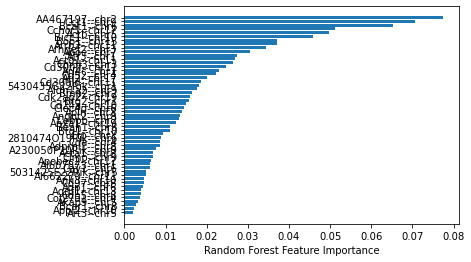

In [47]:
import matplotlib.pyplot as plt
sorted_idx = best_model.feature_importances_.argsort()
plt.barh(total_data_colnames[sorted_idx], best_model.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

#### 12 most important genes 

Text(0.5, 0, 'Random Forest Feature Importance')

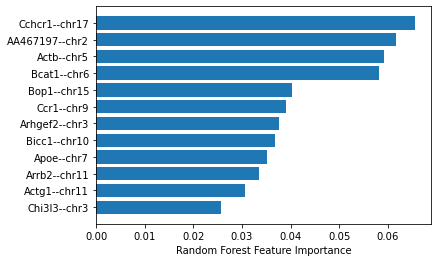

In [27]:
import matplotlib.pyplot as plt
sorted_idx = best_model.feature_importances_.argsort()
plt.barh(total_data_colnames[sorted_idx[-12:]], best_model.feature_importances_[sorted_idx[-12:]])
plt.xlabel("Random Forest Feature Importance")

In [29]:
#### 12 less important genes 

Text(0.5, 0, 'Random Forest Feature Importance')

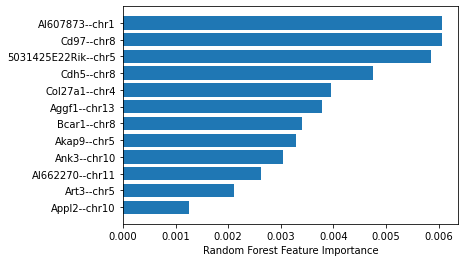

In [28]:
import matplotlib.pyplot as plt
sorted_idx = best_model.feature_importances_.argsort()
plt.barh(total_data_colnames[sorted_idx[:12]], best_model.feature_importances_[sorted_idx[:12]])
plt.xlabel("Random Forest Feature Importance")